In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
def show_img(path, resize = None):
  img = cv2.imread(path)
  img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) #gray scale
  img = cv2.equalizeHist(img) #histogram equalization
  sharpen = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]]) #sharpening image
  img = cv2.filter2D(img,-1,sharpen)
  if resize != None:
    img = cv2.resize(img, resize, interpolation = cv2.INTER_AREA) 
  return img

def over_sampling(class0, class1, class2, class3, class4, class5, class6):
  
  len0 = len(os.listdir(class0))
  len1 = len(os.listdir(class1))
  len2 = len(os.listdir(class2))
  len3 = len(os.listdir(class3))
  len4 = len(os.listdir(class4))
  len5 = len(os.listdir(class5))
  len6 = len(os.listdir(class6)) 

  res_df = pd.DataFrame()

  df_class0 = {
        "images": [],
        "label": []
    }
  for i in os.listdir(class0):
      img_path = os.path.join(class0, i)
      df_class0["images"].append(show_img(img_path, (300, 300)))
      df_class0["label"].append(0)
  df_class0 = pd.DataFrame(df_class0)

  df_class1 = {
        "images": [],
        "label": []
    }
  for i in os.listdir(class1):
      img_path = os.path.join(class1, i)
      df_class1["images"].append(show_img(img_path, (300, 300)))
      df_class1["label"].append(1)
  df_class1 = pd.DataFrame(df_class1)
  df_class1 = df_class1.sample(400, replace = True, random_state = 42)

  df_class2 = {
        "images": [],
        "label": []
    }
  for i in os.listdir(class2):
      img_path = os.path.join(class2, i)
      df_class2["images"].append(show_img(img_path, (300, 300)))
      df_class2["label"].append(2)
  df_class2 = pd.DataFrame(df_class2)

  df_class3 = {
        "images": [],
        "label": []
    }
  for i in os.listdir(class3):
      img_path = os.path.join(class3, i)
      df_class3["images"].append(show_img(img_path, (300, 300)))
      df_class3["label"].append(3)
  df_class3 = pd.DataFrame(df_class3)

  df_class4 = {
        "images": [],
        "label": []
    }
  for i in os.listdir(class4):
      img_path = os.path.join(class4, i)
      df_class4["images"].append(show_img(img_path, (300, 300)))
      df_class4["label"].append(4)
  df_class4 = pd.DataFrame(df_class4)


  df_class5 = {
        "images": [],
        "label": []
    }
  for i in os.listdir(class5):
      img_path = os.path.join(class5, i)
      df_class5["images"].append(show_img(img_path, (300, 300)))
      df_class5["label"].append(5)
  df_class5 = pd.DataFrame(df_class5)

  df_class6 = {
        "images": [],
        "label": []
    }
  for i in os.listdir(class6):
      img_path = os.path.join(class6, i)
      df_class6["images"].append(show_img(img_path, (300, 300)))
      df_class6["label"].append(6)
  df_class6 = pd.DataFrame(df_class6)
  df_class6 = df_class6.sample(400, replace = True, random_state = 42)

  print("EA: ", df_class0.count())
  print("EH_Complex: ", df_class1.count())
  print("EH_Simple: ", df_class2.count())
  print("EP: ", df_class3.count())
  print("NE_Follicular: ", df_class4.count())
  print("NE_Luteal: ", df_class5.count())
  print("NE_Menstrual: ", df_class6.count())
  
  res_df = pd.concat([df_class0, df_class1, df_class2, df_class3, df_class4, df_class5, df_class6], axis = 0)
  return (np.array(list(res_df["images"])), np.array(res_df["label"]))

over_x, over_y = over_sampling("/content/drive/MyDrive/Tarp/Dataset/EA", "/content/drive/MyDrive/Tarp/Dataset/EH_Complex", "/content/drive/MyDrive/Tarp/Dataset/EH_Simple",
                               "/content/drive/MyDrive/Tarp/Dataset/EP", "/content/drive/MyDrive/Tarp/Dataset/NE_Follicular", "/content/drive/MyDrive/Tarp/Dataset/NE_Luteal", 
                               "/content/drive/MyDrive/Tarp/Dataset/NE_Menstrual")

images    201
label     201
dtype: int64
images    495
label     495
dtype: int64
images    495
label     495
dtype: int64


In [ ]:
from equalized_images import *

In [ ]:
equalized_imgs_x,equalized_imgs_labels = equalize_histogram_generator(over_x,over_y)

In [ ]:
for i in range(len(equalized_imgs_x)):
  if(equalized_imgs_x[i].shape != (224, 224)):
    print(i+1)

In [ ]:
equalized_imgs_x

array([[[255, 255, 255, ..., 254, 253, 253],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [169, 173, 246, ...,  99, 130, 197],
        [197, 237, 173, ..., 108, 147, 193],
        [144, 134, 104, ...,  43,  96, 156]],

       [[ 69,  11,   8, ...,  24,  89, 163],
        [ 29,  10,  50, ..., 153, 168, 221],
        [ 60,  38,  97, ..., 212, 255, 255],
        ...,
        [133, 129, 117, ..., 255, 255, 255],
        [126, 121, 115, ..., 255, 255, 255],
        [117, 113, 109, ..., 198, 198, 198]],

       [[204, 208, 208, ..., 255, 255, 255],
        [162, 243, 254, ..., 255, 255, 255],
        [156, 224, 254, ..., 255, 255, 255],
        ...,
        [254, 255, 254, ..., 254, 254, 254],
        [164, 241, 224, ..., 254, 254, 254],
        [143, 145, 167, ..., 254, 254, 254]],

       ...,

       [[154,  15, 100, ..., 157, 254, 219],
        [239, 189,  15, ..., 125, 244, 255],
        [242, 255, 186, ..., 165, 216, 255

In [ ]:
equalized_imgs_x.shape

(990, 224, 224)

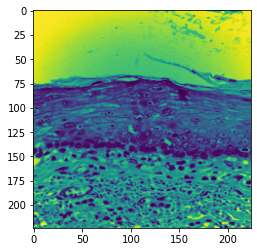

In [ ]:
for i in equalized_imgs_x[0:1,:,:]:
  plt.imshow(i)

In [ ]:
equalized_imgs_x = np.repeat(equalized_imgs_x[..., np.newaxis], 3, -1)
equalized_imgs_x.shape

(990, 224, 224, 3)

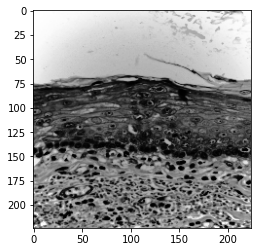

In [ ]:
for i in equalized_imgs_x[0:1,:,:]:
  plt.imshow(i)

In [ ]:
'''
equalized_imgs_x = np.expand_dims(equalized_imgs_x, -1)
equalized_imgs_x = equalized_imgs_x.repeat(3, axis=-1)
equalized_imgs_x.shape
'''

'\nequalized_imgs_x = np.expand_dims(equalized_imgs_x, -1)\nequalized_imgs_x = equalized_imgs_x.repeat(3, axis=-1)\nequalized_imgs_x.shape\n'

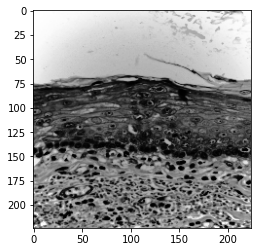

In [ ]:
for i in equalized_imgs_x[0:1,:,:]:
  plt.imshow(i)

In [ ]:
equalized_imgs_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((equalized_imgs_x,equalized_imgs_labels))

In [ ]:
num_elements = tf.data.experimental.cardinality(dataset).numpy()
print(num_elements)

990


In [ ]:
def get_dataset_partitions_tf(ds, ds_size, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=1000,batch_size =16):
    assert (train_split + test_split + val_split) == 1
    
    if shuffle:
        # Specify seed to always have the same split distribution between runs
        ds = ds.shuffle(shuffle_size, seed=42,reshuffle_each_iteration=False)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    train_ds = train_ds.batch(batch_size)
    val_ds = ds.skip(train_size).take(val_size)
    val_ds = val_ds.batch(batch_size)
    test_ds = ds.skip(train_size).skip(val_size)
    test_ds = test_ds.batch(batch_size)
    
    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset,num_elements)

In [ ]:
num_elements2 = tf.data.experimental.cardinality(test_ds).numpy()
print(num_elements2)

7


In [ ]:
'''
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
'''

'\nAUTOTUNE = tf.data.AUTOTUNE\n\ntrain_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)\ntest_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)\nval_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)\n'

In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal_and_vertical'),
  tf.keras.layers.RandomRotation(10),
  tf.keras.layers.RandomTranslation(width_factor=0.2, height_factor=0.2),
  tf.keras.layers.RandomContrast(factor=0.2)
])

In [ ]:
preprocess_input = tf.keras.applications.resnet.preprocess_input

In [ ]:
img_height = 224
img_width = 224
IMG_SHAPE = (img_height,img_width) + (3,)
base_model = tf.keras.applications.ResNet50(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(16, 224, 224, 3)
(16,)


In [ ]:
image_batch, label_batch = next(iter(train_ds))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(16, 7, 7, 2048)


In [ ]:
base_model.trainable = False

In [ ]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(16, 2048)


In [ ]:
prediction_layer = tf.keras.layers.Dense(1,activation="sigmoid")
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(16, 1)


In [ ]:
inputs = tf.keras.Input(shape=(img_height, img_width, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
#x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [ ]:
base_learning_rate = 0.0003
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=["accuracy"])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 tf.__operators__.getitem (S  (None, 224, 224, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 224, 224, 3)      0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                      

In [ ]:
len(model.trainable_variables)

2

In [ ]:
initial_epochs = 100

In [ ]:
history = model.fit(train_ds,
                    epochs=initial_epochs,
                    validation_data=val_ds,
                    verbose=1)

Epoch 1/100
50/50 [==============================] - 11s 102ms/step - loss: 0.7694 - accuracy: 0.4836 - val_loss: 0.6809 - val_accuracy: 0.5657
Epoch 2/100
50/50 [==============================] - 3s 68ms/step - loss: 0.6544 - accuracy: 0.6212 - val_loss: 0.6083 - val_accuracy: 0.6667
Epoch 3/100
50/50 [==============================] - 3s 68ms/step - loss: 0.6108 - accuracy: 0.6806 - val_loss: 0.5470 - val_accuracy: 0.6970
Epoch 4/100
50/50 [==============================] - 3s 68ms/step - loss: 0.5505 - accuracy: 0.7348 - val_loss: 0.5328 - val_accuracy: 0.7172
Epoch 5/100
50/50 [==============================] - 3s 69ms/step - loss: 0.5433 - accuracy: 0.7348 - val_loss: 0.5097 - val_accuracy: 0.7475
Epoch 6/100
50/50 [==============================] - 3s 69ms/step - loss: 0.5332 - accuracy: 0.7348 - val_loss: 0.5066 - val_accuracy: 0.7475
Epoch 7/100
50/50 [==============================] - 3s 69ms/step - loss: 0.4955 - accuracy: 0.7437 - val_loss: 0.5008 - val_accuracy: 0.7475
Epoc

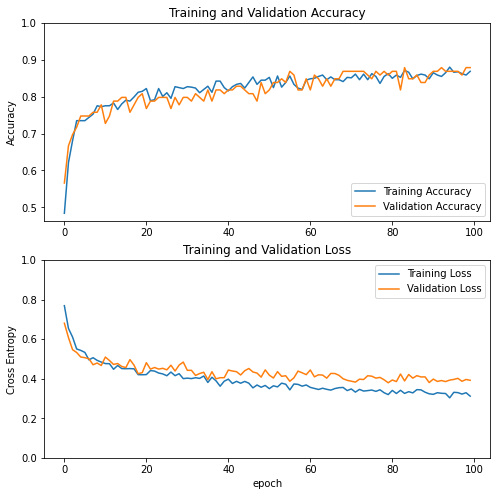

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
loss, accuracy= model.evaluate(test_ds)
print("loss: {:.2f}".format(loss))
print("accuracy: {:.2f}".format(accuracy))

7/7 [==============================] - 0s 49ms/step - loss: 0.3652 - accuracy: 0.8889
loss: 0.37
accuracy: 0.89


In [ ]:
loss, accuracy= model.evaluate(val_ds)
print("Validation loss: {:.2f}".format(loss))
print("Validation accuracy: {:.2f}".format(accuracy))

7/7 [==============================] - 0s 48ms/step - loss: 0.3921 - accuracy: 0.8788
Validation loss: 0.39
Validation accuracy: 0.88


In [ ]:
#model.save('/content/drive/MyDrive/Datasets/bestmodel.h5')

In [ ]:
from keras.models import load_model
model2= load_model('/content/drive/MyDrive/Datasets/bestmodel.h5')


In [ ]:
loss, acc = model2.evaluate(equalized_imgs_x,equalized_imgs_labels)
print("Restored model, accuracy: {:.2f}%".format(100 * acc))

31/31 [==============================] - 6s 122ms/step - loss: 0.3246 - accuracy: 0.8818
Restored model, accuracy: 88.18%
